### Roll No: 31440

# DSBDAL Assignment - 4
# Data Analytics, I

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Dataset:** https://github.com/selva86/datasets/blob/master/BostonHousing.csv
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per house
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 dollars
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s dollars

In [3]:
# Importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Data Preprocessing

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Checking for null values

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Visualizations

<AxesSubplot:>

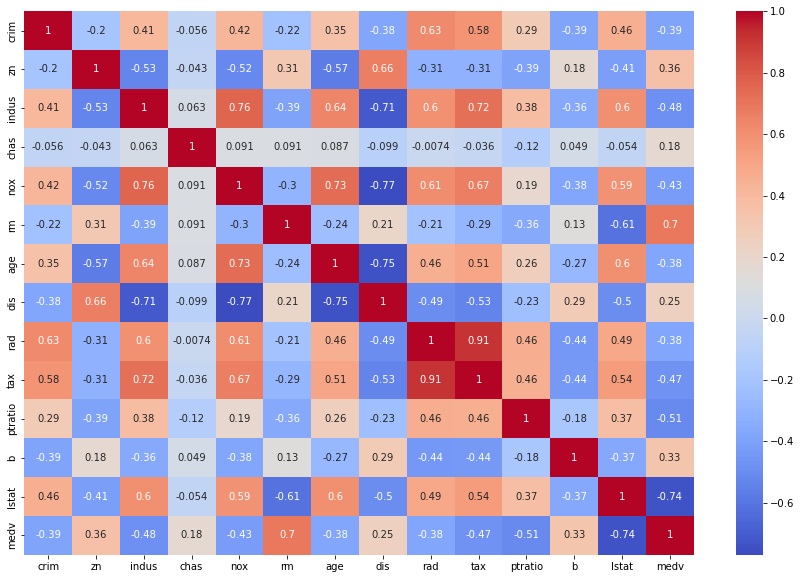

In [7]:
# Plotting a heatmap for the correlation matrix

plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sb.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm")

**Observations:**
- As **medv** is the target variable we look for correlation of other variables with medv
- We can see that **medv** has a high positive correlation with **rm** and a high negative correlation with **lstat**
- We can also see that **medv** has a medium negative correlation with **indus**, **tax** and **ptratio**

## Finding and dealing with outliers

<AxesSubplot:xlabel='lstat'>

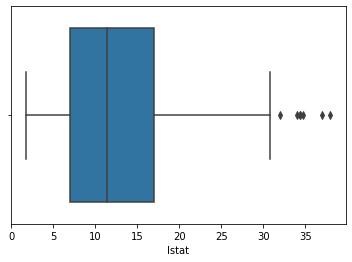

In [8]:
sb.boxplot(x = df["lstat"])

<AxesSubplot:xlabel='rm'>

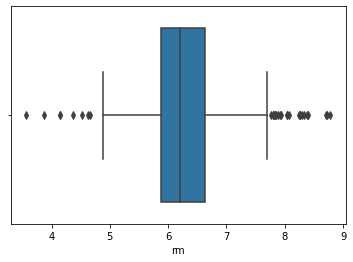

In [9]:
sb.boxplot(x = df["rm"])

<AxesSubplot:xlabel='ptratio'>

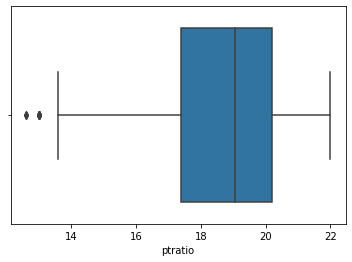

In [10]:
sb.boxplot(x = df["ptratio"])

<AxesSubplot:xlabel='indus'>

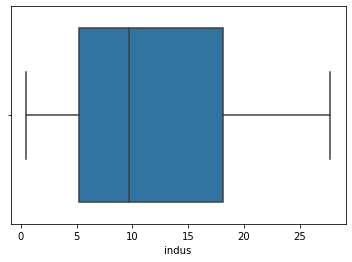

In [11]:
sb.boxplot(x = df["indus"])

<AxesSubplot:xlabel='tax'>

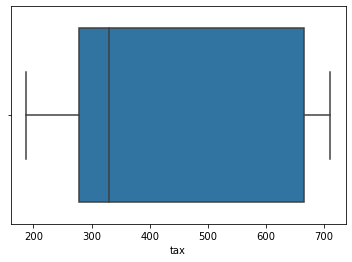

In [12]:
sb.boxplot(x = df["tax"])

### Interquartile Range

In [13]:
cols = df[["lstat", "rm", "ptratio", "indus", "tax"]].columns
cols

Index(['lstat', 'rm', 'ptratio', 'indus', 'tax'], dtype='object')

In [14]:
# Finding the interquartile range for the columns under consideration
result = stats.iqr(df[cols], axis = 0)
result

array([ 10.005,   0.738,   2.8  ,  12.91 , 387.   ])

In [15]:
df.drop(df[df["lstat"] < (df["lstat"].quantile(0.25) - 1.5 * result[0])].index, inplace = True)
df.drop(df[df["rm"] < (df["rm"].quantile(0.25) - 1.5 * result[1])].index, inplace = True)
df.drop(df[df["ptratio"] < (df["ptratio"].quantile(0.25) - 1.5 * result[2])].index, inplace = True)
df.drop(df[df["indus"] < (df["indus"].quantile(0.25) - 1.5 * result[3])].index, inplace = True)
df.drop(df[df["tax"] < (df["tax"].quantile(0.25) - 1.5 * result[4])].index, inplace = True)

In [16]:
df.drop(df[df["lstat"] > (df["lstat"].quantile(0.75) + 1.5 * result[0])].index, inplace = True)
df.drop(df[df["rm"] > (df["rm"].quantile(0.75) + 1.5 * result[1])].index, inplace = True)
df.drop(df[df["ptratio"] > (df["ptratio"].quantile(0.75) + 1.5 * result[2])].index, inplace = True)
df.drop(df[df["indus"] > (df["indus"].quantile(0.75) + 1.5 * result[3])].index, inplace = True)
df.drop(df[df["tax"] > (df["tax"].quantile(0.75) + 1.5 * result[4])].index, inplace = True)

In [17]:
df.shape

(469, 14)

## Splitting dataset for training and testing

Based on the scatter plots above I am chosing **lstat**, **rm** and **ptratio** as the features for the regression model

In [18]:
# Concatenating LSTAT, RM and PTRATIO columns to form a new dataframe

X = pd.DataFrame(np.c_[df["lstat"], df["rm"], df["ptratio"]], columns = ["lstat", "rm", "ptratio"])
Y = df["medv"]

print("X: \n", X)
print("\nY: \n", Y)

X: 
      lstat     rm  ptratio
0     4.98  6.575     15.3
1     9.14  6.421     17.8
2     4.03  7.185     17.8
3     2.94  6.998     18.7
4     5.33  7.147     18.7
..     ...    ...      ...
464   9.67  6.593     21.0
465   9.08  6.120     21.0
466   5.64  6.976     21.0
467   6.48  6.794     21.0
468   7.88  6.030     21.0

[469 rows x 3 columns]

Y: 
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 469, dtype: float64


In [19]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(375, 3)
(94, 3)
(375,)
(94,)


## Training the model

In [20]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

## Testing the model

In [21]:
# model performance for training set
train_prediction = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, train_prediction)))
r2 = r2_score(Y_train, train_prediction)

print("For training dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2 * 100))

# model performance for testing set
test_prediction = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, test_prediction)))
r2 = r2_score(Y_test, test_prediction)

print("\nFor testing dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2 * 100))

For training dataset:
Root Mean Square Error is 4.636345239535981
Accuracy is 65.05739393323569%

For testing dataset:
Root Mean Square Error is 4.460326910461066
Accuracy is 62.13084636310848%
